In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
path = '/content/gdrive/MyDrive/Python/Data_Science_8/2017_jun_final.csv'
my_df = pd.read_csv(path)
#print(my_df)

Mounted at /content/gdrive


In [3]:
print(my_df.head(3))

   N           Должность Язык.программирования Специализация  \
0  1  Junior QA engineer                   NaN     Manual QA   
1  2  Junior QA engineer                   NaN     Manual QA   
2  3   Software Engineer               C#/.NET           NaN   

  Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0               0.5                          0.5               400   
1  меньше 3 месяцев             меньше 3 месяцев               430   
2                 4                            1              2500   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  ...  \
0                                 0  Харьков       до 10 человек  ...   
1                               130  Харьков  свыше 1000 человек  ...   
2                               800     Киев     до 1000 человек  ...   

  Еще.студент Уровень.английского                    Предметная.область  \
0        True       ниже среднего                         iOS,eCommerce   
1        True      

In [4]:
print(my_df.shape)

(8704, 25)


In [5]:
print(my_df.dtypes)

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [6]:
my_df.columns

Index(['N', 'Должность', 'Язык.программирования', 'Специализация',
       'Общий.опыт.работы', 'Опыт.работы.на.текущем.месте', 'Зарплата.в.месяц',
       'Изменение.зарплаты.за.12.месяцев', 'Город', 'Размер.компании',
       'Тип.компании', 'Пол', 'Возраст', 'Образование', 'Университет',
       'Еще.студент', 'Уровень.английского', 'Предметная.область',
       'Дата.заполнения', 'User.Agent', 'exp', 'current_job_exp', 'salary',
       'Валюта', 'cls'],
      dtype='object')

In [7]:
pd.isnull(my_df).sum()

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

In [8]:
df_work = my_df.drop(columns=['Специализация','Университет','Предметная.область','Валюта','cls'])

In [9]:
pd.isnull(df_work).sum()

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

In [10]:
df_work = df_work.dropna()

In [11]:
df_work.shape

(4854, 20)

In [12]:
df_work = df_work.loc[df_work['Язык.программирования'] == 'Python']

In [21]:
df_plot = df_work.groupby(['Должность']).agg({'Зарплата.в.месяц':['min', 'max']})
df_plot.columns

MultiIndex([('Зарплата.в.месяц', 'min'),
            ('Зарплата.в.месяц', 'max')],
           )

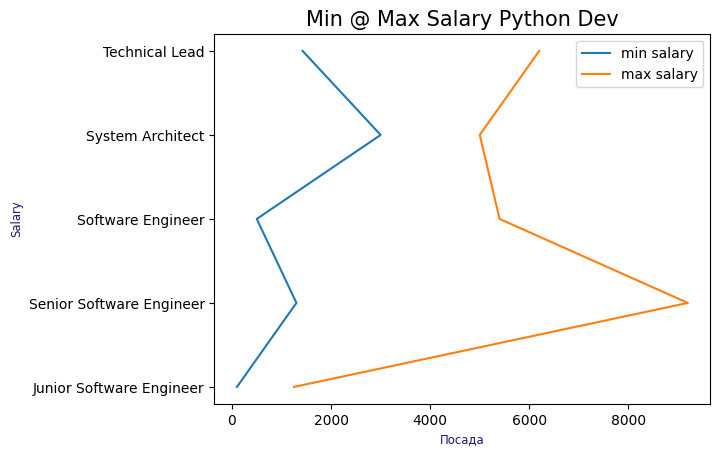

In [24]:
fig, axs = plt.subplots()
axs.plot(df_plot['Зарплата.в.месяц', 'min'], df_plot.index, label='min salary')
axs.plot(df_plot['Зарплата.в.месяц', 'max'], df_plot.index, label='max salary')
plt.xlabel('Посада', fontsize='small', color='midnightblue')
plt.ylabel('Salary', fontsize='small', color='midnightblue')
plt.title('Min @ Max Salary Python Dev', fontsize=15)
plt.legend()
plt.show()

In [26]:
fill_avg_salary = lambda x: x.groupby(['Должность']).agg({'Зарплата.в.месяц':['mean']}) 
avg = fill_avg_salary(df_work)
df_avg = avg.describe()
print(df_avg)
df_avg.to_csv('/content/gdrive/MyDrive/Python/Data_Science_8/avg_statistic.csv', index=False)

      Зарплата.в.месяц
                  mean
count         5.000000
mean       2582.583427
std        1387.255829
min         560.841270
25%        1799.070000
50%        3165.909091
75%        3387.096774
max        4000.000000
